In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import PIL
import os
import tensorflow as tf
from tensorflow.keras import layers, models

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

228813984/228813984 [==============================] - 8s 0us/step


In [3]:
data_dir

'.\\datasets\\flower_photos'

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [6]:
list(data_dir.glob('*/*.jpg'))[:7]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1031799732_e7f4008c03.jpg')]

In [12]:
count = len(list(data_dir.glob('*/*.jpg')))
count

3670

In [15]:
roses= list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

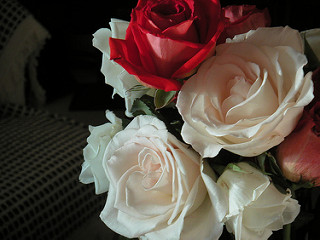

In [17]:
PIL.Image.open(roses[1])

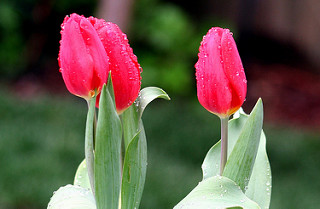

In [25]:
tulips= list(data_dir.glob('tulips/*'))
PIL.Image.open(tulips[0])

In [26]:
flowers_img_dir_dict= {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [27]:
flowers_class_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [36]:
img = cv2.imread(str(flowers_img_dir_dict['roses'][0]))
img.shape

(240, 179, 3)

In [38]:
cv2.resize(img, (180, 180)).shape

(180, 180, 3)

In [39]:
x,y=[],[]

for flower_name, images in flowers_img_dir_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (180,180))
        x.append(resized_img)
        y.append(flowers_class_labels_dict[flower_name])

In [42]:
x=np.array(x)
y=np.array(y)

In [43]:
x.shape, y.shape

((3670, 180, 180, 3), (3670,))

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [45]:
scaled_x_train = x_train/255
scaled_x_test = x_test/255

In [46]:
x_train.shape, x_test.shape

((2936, 180, 180, 3), (734, 180, 180, 3))

In [50]:
cnn_model = models.Sequential([
    layers.Conv2D(filters=16, kernel_size=(3,3), padding='same', input_shape=(180,180,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activaation='relu'),
    layers.Dense(5, activation='sigmoid')
])
cnn_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
cnn_model.fit(scaled_x_train, y_train, epochs=5)

Epoch 1/5
92/92 [==============================] - 86s 704ms/step - loss: 1.4449 - accuracy: 0.4455
Epoch 2/5
92/92 [==============================] - 82s 865ms/step - loss: 0.9618 - accuracy: 0.6233
Epoch 3/5
92/92 [==============================] - 83s 904ms/step - loss: 0.6460 - accuracy: 0.7704
Epoch 4/5
92/92 [==============================] - 79s 861ms/step - loss: 0.3308 - accuracy: 0.8934
Epoch 5/5
92/92 [==============================] - 58s 634ms/step - loss: 0.1598 - accuracy: 0.9547


In [51]:
cnn_model.evaluate(scaled_x_test,y_test)

23/23 [==============================] - 11s 283ms/step - loss: 1.5334 - accuracy: 0.6049


[1.5334210395812988, 0.6049046516418457]

We got a low test accuracy, only 60.49%, whereas our training accuracy is 95.47%

In [52]:
y_pred = cnn_model.predict(scaled_x_test)

23/23 [==============================] - 4s 147ms/step


In [54]:
y_pred = [np.argmax(i) for i in y_pred]

In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.43      0.51       150
           1       0.61      0.37      0.46       126
           2       0.64      0.68      0.66       172
           3       0.72      0.76      0.74       129
           4       0.51      0.75      0.61       157

    accuracy                           0.60       734
   macro avg       0.62      0.60      0.59       734
weighted avg       0.61      0.60      0.60       734



<b style="color:lightgreen"><i>Using the data Augmentation, to improve the performance</i></b>

In [61]:
class_names = ['roses', 'daisy', 'dandelion', 'sunflowers', 'tulips']

Text(0.5, 0, 'tulips')

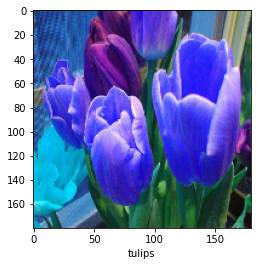

In [126]:
import random

i = random.randint(0, len(x))
plt.imshow(x[i])
plt.xlabel(class_names[y[i]])

We can use the Keras preprocessing layers, such as <b style='color:lightgreen'>tf.keras.layers.(Resizing, Rescaling, RandomFlip, RandomRotation, RandomBrightness, randomContrast, RandomCrop, RandomHeight, RandomTranslation, RandomWidth, RandomZoom)</b>. </br>
Also, we can use the tf.image methods, such as <b style='color:orange'>tf.image.(flip_left_right, rgb_to_grayscale, adjust_brightness, adjust_*(...), central_crop, and stateless_random*(...))</b>.

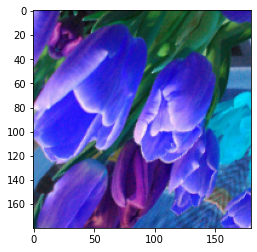

In [129]:
augmentation_model_trial = models.Sequential([
    #layers.experimental.preprocessing.RandomZoom(-0.5)
    #layers.experimental.preprocessing.RandomContrast(0.8)
    layers.experimental.preprocessing.RandomRotation(0.58)
])

plt.imshow(augmentation_model_trial(x[i]).numpy().astype('uint8'))

In [131]:
augmentation_layer=models.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical",input_shape=(180,180,3)),
    layers.experimental.preprocessing.RandomRotation(0.54),
    layers.experimental.preprocessing.RandomZoom(0.2),
])

In [135]:
augmented_cnn_model = models.Sequential([
    augmentation_layer,
    layers.Conv2D(filters=16, kernel_size=(3,3), padding='same', input_shape=(180,180,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(128, activation='relu'),
    layers.Dense(5, activation='sigmoid')
])
augmented_cnn_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
augmented_cnn_model.fit(scaled_x_train, y_train, epochs=15)

Epoch 1/15
92/92 [==============================] - 106s 837ms/step - loss: 1.4518 - accuracy: 0.3934
Epoch 2/15
92/92 [==============================] - 90s 975ms/step - loss: 1.1329 - accuracy: 0.5364
Epoch 3/15
92/92 [==============================] - 91s 992ms/step - loss: 1.0582 - accuracy: 0.5688
Epoch 4/15
92/92 [==============================] - 90s 983ms/step - loss: 0.9936 - accuracy: 0.5984
Epoch 5/15
92/92 [==============================] - 97s 1s/step - loss: 0.9435 - accuracy: 0.6158
Epoch 6/15
92/92 [==============================] - 91s 988ms/step - loss: 0.9280 - accuracy: 0.6240
Epoch 7/15
92/92 [==============================] - 70s 755ms/step - loss: 0.8842 - accuracy: 0.6505
Epoch 8/15
92/92 [==============================] - 91s 990ms/step - loss: 0.8535 - accuracy: 0.6553
Epoch 9/15
92/92 [==============================] - 93s 1s/step - loss: 0.8350 - accuracy: 0.6720
Epoch 10/15
92/92 [==============================] - 93s 1s/step - loss: 0.8177 - accuracy: 0.68

In [136]:
augmented_cnn_model.evaluate(scaled_x_test,y_test)

23/23 [==============================] - 6s 154ms/step - loss: 0.8271 - accuracy: 0.6866


[0.8270730376243591, 0.6866484880447388]

In [137]:
y_pred1 = augmented_cnn_model.predict(scaled_x_test)
y_pred1=[np.argmax(i) for i in y_pred1]

23/23 [==============================] - 4s 153ms/step


In [138]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.67      0.50      0.57       150
           1       0.63      0.79      0.70       126
           2       0.77      0.74      0.76       172
           3       0.68      0.88      0.76       129
           4       0.68      0.57      0.62       157

    accuracy                           0.69       734
   macro avg       0.68      0.69      0.68       734
weighted avg       0.69      0.69      0.68       734

